 # 1. Thu thập thu thập dữ liệu

## 1.1 Nhập thư viện sử dụng

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

## 1.2 Nhập dữ liệu vào từ file

Đọc dữ liệu

In [2]:
base_path = os.path.dirname(os.path.abspath(__name__))
data = pd.read_csv("spam_ham_dataset.csv")
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


Xử lý "sơ bộ" dữ liệu

In [3]:
#Xem Shape dữ liệu (Số sample, số chiều) trước khi loại bỏ trùng lặp
print('Shape before deleting duplicate values:', data.shape)

# Loại bỏ dữ liệu trùng lặp
data=data.drop_duplicates()

#Xem Shape dữ liệu (Số sample, số chiều) sau khi loại bỏ trùng lặp
print('Shape After deleting duplicate values:', data.shape)

# In ra dữ liệu sample để observe 
data.head(10)



Shape before deleting duplicate values: (5171, 4)
Shape After deleting duplicate values: (5171, 4)


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


# 2. Khám phá cơ bản về dữ liệu

## 2.1 Xem phân bố của biến mục tiêu

<AxesSubplot:xlabel='label'>

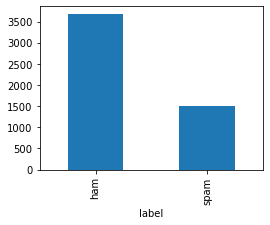

In [4]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=data.groupby('label').size()
GroupedData.plot(kind='bar', figsize=(4,3))

Phân phối dữ liệu của biến mục tiêu là đảm bảo để tiếp tục. Không quá lệch giữa hai biến phân loại mục tiêu (ham và spam).

In [5]:
#Quan sat mot so thong tin cac truong du lieu cua sample
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 202.0+ KB


In [6]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

=> Dữ liệu hiện không có trường nào bị null

In [7]:
data.nunique()

Unnamed: 0    5171
label            2
text          4993
label_num        2
dtype: int64

=> Có 3 trường:
* Uname: Biến rời rạc.  1 số không rõ ý nghĩa trường này
* label: Category
* text: Dữ liệu text là nội dung email
* label_num: Category

# 3. Trực quan hóa dữ liệu

In [33]:
spam_messages = data[data["label"] == "spam"]["text"]
ham_messages = data[data["label"] == "ham"]["text"]

spam_words = []
ham_words = []


import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       None
1       None
2       None
4       None
5       None
        ... 
5165    None
5166    None
5167    None
5168    None
5169    None
Name: text, Length: 3672, dtype: object

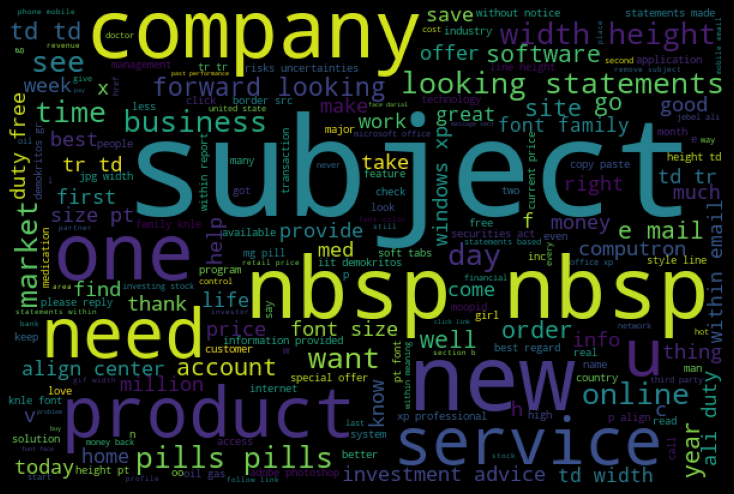

In [37]:
#Spam Word cloud
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 4. Tiền xử lý dữ liệu

## 4.1 Chuyển đổi cột label

## 4.2 Encode dữ liệu text về dạng ma trận

Văn bản phải được phân tích cú pháp để loại bỏ các từ, được gọi là mã hóa (tokenization). Sau đó, các từ cần được mã hóa dưới dạng số nguyên hoặc giá trị dấu phẩy động để sử dụng làm đầu vào cho thuật toán học máy, được gọi là trích rút đặc trưng ( feature extraction) (hoặc vectơ hóa - vectorization).

Một số cách chuyển đổi văn bản thành vector:

Cách chuyển đổi văn bản thành vector đếm từ với CountVectorizer.

Cách chuyển đổi văn bản thành vector tần số từ với TfidfVectorizer.

Cách chuyển đổi văn bản thành số nguyên duy nhất với HashingVectorizer.

## 4.2 Tách tập training, validation và testing

In [8]:
list_text = data['text']
list_label = data['label']
X_train, X_test, Y_train, Y_test = train_test_split(list_text, list_label, test_size=0.2, random_state=3)
print("X train size: "+ str(len(X_train)))
print("X test size: "+ str(len(X_test)))
print("Y train size: "+ str(len(Y_train)))
print("Y test size: "+ str(len(Y_test)))


X train size: 4136
X test size: 1035
Y train size: 4136
Y test size: 1035


In [9]:
import re
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [10]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))


In [14]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_transformed = feature_extraction.fit_transform(X_train)
X_test_transformed = feature_extraction.transform(X_test)

In [15]:
print(X_test_transformed)

  (0, 39460)	0.13587341009185985
  (0, 39104)	0.10893514608734968
  (0, 36905)	0.12163506127762486
  (0, 35395)	0.10245015660702037
  (0, 35332)	0.3136154590625934
  (0, 34983)	0.12490970895029331
  (0, 34775)	0.019055238736512155
  (0, 34353)	0.08528545393496313
  (0, 33846)	0.08399063784999249
  (0, 33746)	0.09137228353170423
  (0, 33542)	0.15132587896051342
  (0, 32677)	0.062462933689023996
  (0, 32654)	0.07245322408821461
  (0, 32506)	0.13204958208240664
  (0, 30509)	0.11640560166468247
  (0, 30144)	0.09157828811903047
  (0, 30134)	0.12490970895029331
  (0, 28550)	0.12745418151557253
  (0, 28055)	0.12886632661724048
  (0, 28048)	0.11972794708124573
  (0, 28043)	0.21489914060475565
  (0, 26325)	0.12065765530748788
  (0, 25123)	0.05623199462097467
  (0, 23868)	0.22849219302092494
  (0, 22881)	0.08732623447622505
  :	:
  (1034, 21132)	0.1006994929271611
  (1034, 19042)	0.10680769198921657
  (1034, 17651)	0.26002277199310575
  (1034, 17325)	0.1121568475759866
  (1034, 16609)	0.09061552

# 5. Xây dự mô hình máy học

## 5.1 Sử dụng Random forest

### 5.1.1 Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating the model on Training Data
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=1000,criterion='gini')
clf.fit(X_train_transformed, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000)

### 5.1.2 Testing (predic and perf)

In [ ]:
print("Classifying test set...\n")
prediction = clf.predict(X_test_transformed)
from sklearn import metrics
print("Classification Report:")
# Measuring accuracy on Testing Data
#print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))
print("Accuracy:",metrics.accuracy_score(Y_test, prediction))

Classifying test set...

Classification Report:
[[729   0]
 [229  77]]
Accuracy: 0.778743961352657


## 5.2 Sử dụng Naive bayes

### 5.2.1 Training

In [16]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_transformed.toarray(), Y_train)

GaussianNB()

### 5.2.2 Testing

In [ ]:
print("Classifying test set...\n")
prediction = clf.predict(X_test_transformed.toarray())

from sklearn import metrics
print("Classification Report:")
# Measuring accuracy on Testing Data
print(metrics.confusion_matrix(Y_test, prediction))
print("Accuracy:",metrics.accuracy_score(Y_test, prediction))

Classifying test set...

Classification Report:
[[708  21]
 [ 20 286]]
Accuracy: 0.9603864734299516


### 5.3 Su dung svm

In [ ]:
from sklearn import svm
clf = svm.SVC(C = 1.0, gamma='auto',kernel='linear')
clf.fit(X_train_transformed, Y_train)

print("Classifying test set...\n")
prediction = clf.predict(X_test_transformed)

print("Classification Report:")
# Measuring accuracy on Testing Data
#print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))
print("Accuracy:",metrics.accuracy_score(Y_test, prediction))

Classifying test set...

Classification Report:
[[716  13]
 [  1 305]]
Accuracy: 0.9864734299516909
